<a href="https://colab.research.google.com/github/appleissteve1976/ML-Implementation/blob/main/Kernal_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Dataset

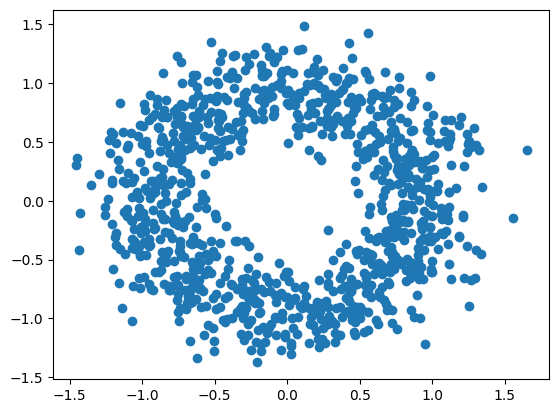

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)
plt.scatter(X[:, 0], X[:, 1])


In [ ]:
samples = X.shape[0]
features = X.shape[1]
samples, features

(1000, 2)

Kernalization

In [ ]:
def PolyKernel(X, p):
  return (X.dot(X.T)+1)**p
K = PolyKernel(X, 2)
n = K.shape[0]
print(np.sqrt((K ** 2).sum()) / (n))

2.096195646589988


Gaussian Kernal

In [ ]:
def Gkernel(x, y, s):
  return np.exp((-np.linalg.norm((x-y))**2)/(2*(s**2)))

def RBFKernel(X, sigma):
  n = X.shape[0]
  return np.array([Gkernel(X[i], X[j], sigma) for i in range(n) for j in range(n)]).reshape(n, n)

In [ ]:
K1 = RBFKernel(X, 2)
print(np.sqrt((K1 ** 2).sum()) / (n))

0.8079400085320029


Centering

In [ ]:
def K_centered(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  return K
KC = K_centered(K)
print(np.sqrt((KC ** 2).sum()) / (1000))

1.4517985176976844


Kernal PCA

In [ ]:
def Projection(M):
    eigval, eigvec = np.linalg.eigh(M)
    lambda_1, lambda_2 = eigval[-1], eigval[-2]
    alpha_1, alpha_2 = eigvec[:, -1]/ (np.linalg.norm(eigvec[:, -1])*np.sqrt(lambda_1)), eigvec[:, -2]/(np.linalg.norm(eigvec[:, -2])*np.sqrt(lambda_2))
    return alpha_1.dot(M), alpha_2.dot(M)
    #return eigvec[:, -1], eigvec[-2]

pc1, pc2 = Projection(KC)
print((np.abs(pc1).sum()+ np.abs(pc2).sum())/len(pc2))

1.7447267990953332
